In [4]:
import requests
import json
import time
from datetime import datetime
import pandas as pd

In [68]:
# !pip install numpy
# !pip install matplotlib
import numpy as np
from numpy import savetxt
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

In [130]:
def viewAllDataFromFolder(dataPath):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    dataList = []
    for fs in onlyfiles:
        count = count + 1
        dataItem = pd.read_pickle(dataPath+"/"+fs)
        dataList.append(dataItem)
    frame = pd.concat(dataList)
    return frame
dataset = viewAllDataFromFolder("data")

# Data Shape and Label Count

In [131]:
print("Data Shape",dataset.shape)
print("Label counts:")
print(dataset["label"].value_counts())

Data Shape (10876, 14)
Label counts:
1    5552
0    5324
Name: label, dtype: int64


# Data Overview

In [133]:
dataset["timemm"] = dataset.index
dataset['timemm'] = dataset['timemm'].apply(lambda x: datetime.fromtimestamp(x))
dataset["year"] = dataset['timemm'].apply(lambda x:x.year)
dataset["month"] = dataset['timemm'].apply(lambda x:x.month)
dataset["day"] = dataset['timemm'].apply(lambda x:x.day)
dataset["hour"] = dataset['timemm'].apply(lambda x:x.hour)
dataset["minute"] = dataset['timemm'].apply(lambda x:x.minute)
dataset["second"] = dataset['timemm'].apply(lambda x:x.second)
del dataset['timemm']

dataset["node"] = dataset["node"].apply(lambda x : 2 if x=="tan-k2" else 3 if x=="tan-k3" else 1 if x=="tan-km" else x)

## Proprotion of nodes

In [137]:
print(dataset["node"].value_counts())

3    8306
2    1285
1    1285
Name: node, dtype: int64


In [138]:
dataset.head()

,cpu_system,cpu_idle,cpu_user,cpu_iowait,pod_count,system_load,mem_total,mem_avail,disk_io,disk_space_used,net_received,net_transmit,node,label,year,month,day,hour,minute,second
timestamp,,,,,,,,,,,,,,,,,,,,
1.625210e+09,0.055000,0.758333,0.171000,0.001000,9.0,0.70,2.641199e+09,1.444844e+09,0.006933,0.590030,605856.533333,8.034681e+06,2,1,2021,7,2,7,16,45
1.625210e+09,0.055000,0.758333,0.171000,0.001000,9.0,0.70,2.641199e+09,1.444844e+09,0.006933,0.590030,605856.533333,8.034681e+06,2,1,2021,7,2,7,16,50
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,16,55
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,17,0
1.625210e+09,0.046333,0.813333,0.115333,0.000667,9.0,0.71,2.678424e+09,1.407619e+09,0.001867,0.590039,893741.333333,8.794958e+06,2,1,2021,7,2,7,17,5


In [126]:
# dataset.index.to_list()

In [125]:
# def strToSecond(date_time_str):
#     date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
#     return (int(date_time_obj.timestamp()))

# timestamp = strToSecond("2021-06-17 15:30:50")
# print(timestamp)
# dt_object = datetime.fromtimestamp(timestamp)
# print("dt_object =", dt_object)
# print("minutes:",dt_object.year)
# print("month:",dt_object.month)
# print("day:",dt_object.day)
# print("hour:",dt_object.hour)
# print("minutes:",dt_object.minute)
# print("second:",dt_object.second)

In [189]:
def plotMultipleValues(xls, yls,queryList):
    xls = np.array(xls)
    yls = np.array(yls)
    xlen = xls.shape[0]
    divident = 3
    xc = xlen % divident
    if xc > 0 :
        xc = int(xlen / divident) + 1
    else :
        xc = int(xlen / divident)
    yc = divident
    fig, axs = plt.subplots(xc, yc)
    plt.subplots_adjust(top=1.5,wspace=0.8,hspace=0.8)
    for i in range(0,xlen):
        axs[int(i/divident), i%divident].plot(xls[i], yls[i])
        axs[int(i/divident), i%divident].set_title(queryList[i][1])

In [217]:
def viewMetric(metric, dataset):
    ndf = dataset[[metric,"label","node"]]
#     print("View each label in a graph and put them next to others")
#     print("Calculate min max std ..")
    ndf0 = ndf[ndf["label"]==0]
    ndf1 = ndf[ndf["label"]==1]

    fig, (ax0, ax1) = plt.subplots(1, 2)
    fig.set_size_inches(15, 3)
    ax0.plot(ndf0[metric].to_numpy())
    ax0.set_title(metric+" with label 0")
    ax1.plot(ndf1[metric].to_numpy())
    ax1.set_title(metric+" with label 1")

def viewAllMetrics(dataset):
    cols = dataset.columns
    for e in range(0,12):
        viewMetric(cols[e],dataset)

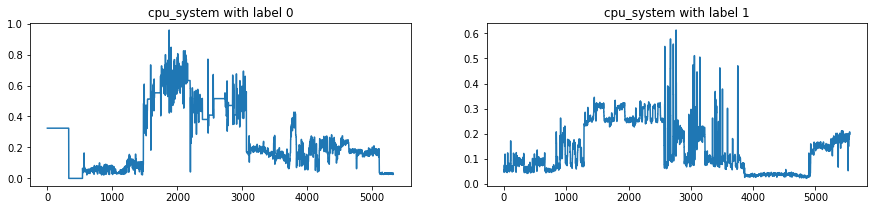

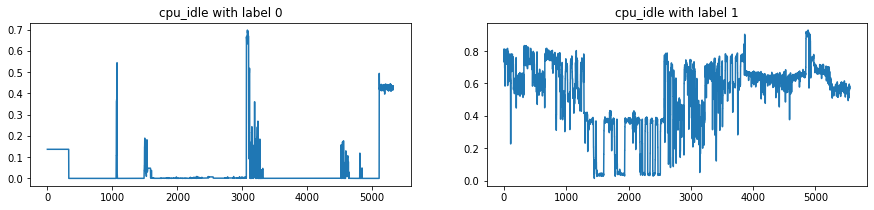

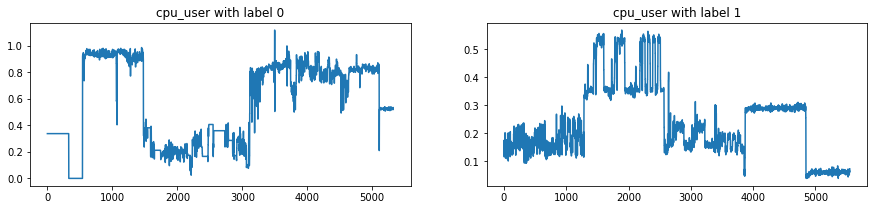

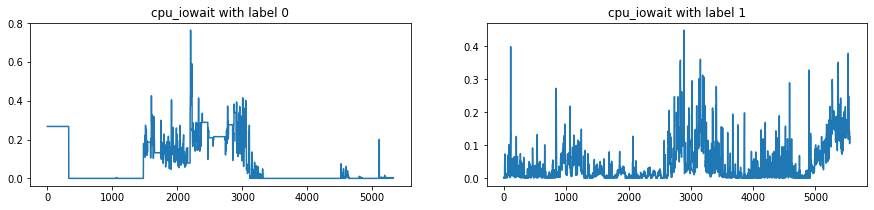

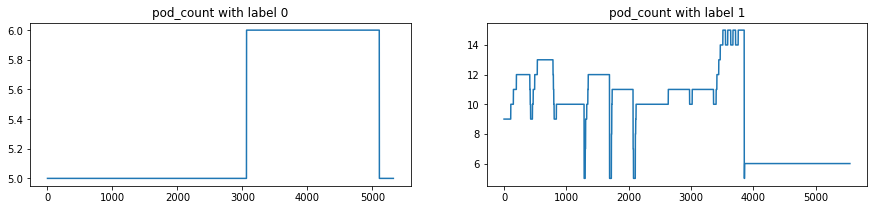

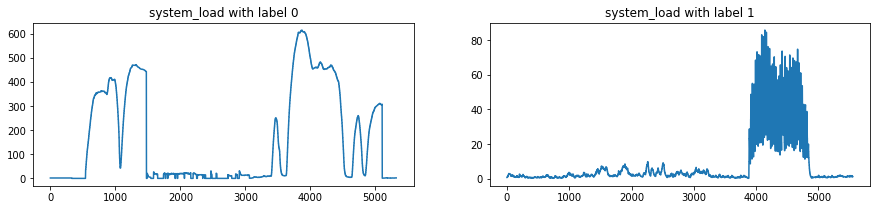

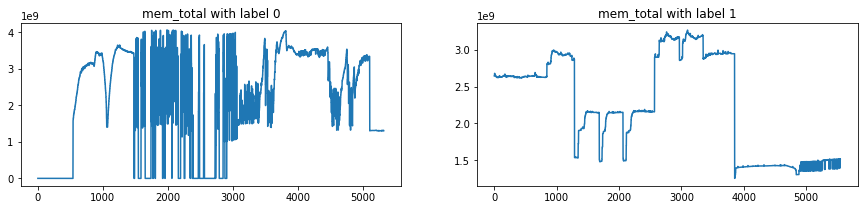

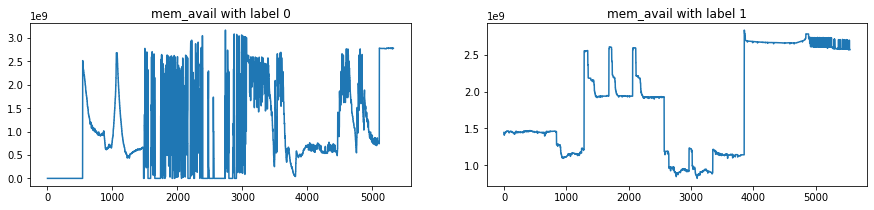

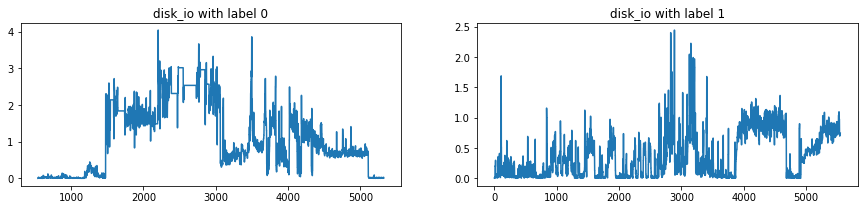

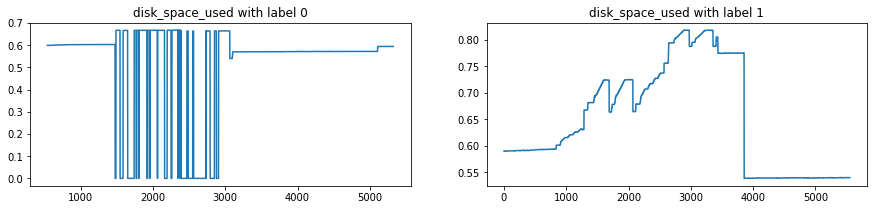

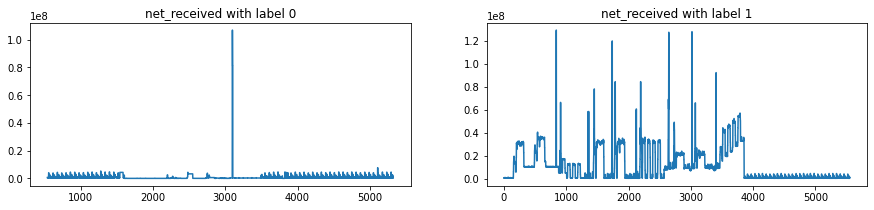

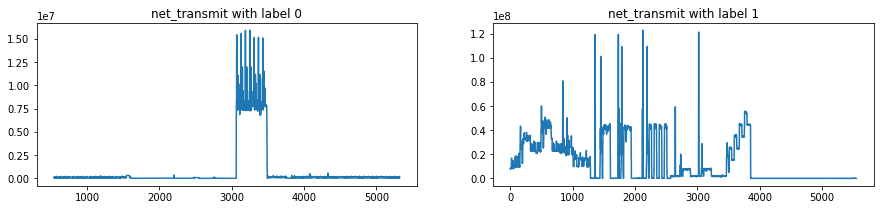

In [218]:
viewAllMetrics(dataset)